The other day, I came across an interesting [article](http://chrishenson.net/website/zeta.html) by Chris Henson on the relationship between the Riemann Zeta function and prime numbers. After encoutering a similar post on the [math Stack Exchange](https://math.stackexchange.com/questions/410597/zeta-function-and-probability), I thought I'd write an article on the same topic as well, perhaps as sort of a prologue to a previous article posted on this blog, [Basel, Zeta, and some more Euler](https://jaketae.github.io/study/basel-zeta/). The code introduced in this blog are adaptations of those written by Chris Henson, so all credits go to the original author. 

With that said, let's dive right into it.

# Riemann Zeta Function

The Riemann Zeta function is perhaps one of the most deeply studied functions in all of modern mathematics. It is sometimes also referred to as the Euler-Riemann Zeta function, but I will not adhere to this convention not only because it is needlessly long and cumbersome, but also because Euler already has so many constants and functions and theorems bearing his name. Anyhow, the Riemann Zeta function looks as followss:

$$
\begin{align}
\zeta (s)
&= 1 + \frac{1}{2^s} + \frac{1}{3^s} + \cdots  \\
&= \sum_{n = 1}^\infty \frac{1}{n^s}
\end{align} \tag{1}
$$

While there are so many layers to explore with this function, one relatively simple and interesting route is to factorize this function. We performed this factorization in the [previous post](https://jaketae.github.io/study/basel-zeta/) while introducing Euler's infinite product representation of the Zeta function. Let's go through this step again, as it is pivotal for our segway into the topic of prime numbers and probability. 

## Infinite Product Representation

The idea is that, much like we multiply the ratio to a geometric sequence to calculate its sum, we can multiply terms to the Zeta function to factor out their multiples. For instance, let's consider the case when we multiply $1/s^s$ to the Zeta function.

$$
\frac{1}{2^s} \zeta(s) = \frac{1}{2^s} + \frac{1}{4^s} + \frac{1}{6^s} + \cdots = \sum_{i = 1}^\infty \frac{1}{(2i)^s} \tag{2}
$$


Since the Zeta function itself is an infinite series, we can subtract this result from the original Zeta function. This effectively filters or sieves out all terms whose denominator is a multiple of 2, effectively leaving only the odd terms. Concretely,

$$
\left(1 - \frac{1}{2^s} \right) \zeta(s) = 1 + \frac{1}{3^s} +  \frac{1}{5^s} +  \cdots \tag{3}
$$

If we repeat this process for all prime numbers, we will eventually be left with the following:

$$
\prod_{p \in \mathbb{P}} \left(1 - \frac{1}{p^s} \right) \zeta(s) = 1 \tag{4}
$$

where $\mathbb{P}$ denotes the set of all prime numbers.

From this, we can come up with the following alternative representation of the Riemann Zeta function:

$$
\zeta(s) = \prod_{p \in \mathbb{P}} \left(1 - \frac{1}{p^s} \right)^{-1} \tag{5}
$$

which can also be expressed as 

$$
\prod_{p \in \mathbb{P}} \left(1 - \frac{1}{p^s} \right) = \frac{1}{\zeta(s)} \tag{6}
$$

## Probabilistic Interpretation

Other than the fact that the factorization of the Riemann Zeta function is satisfying in and of itself, the result in (5) also provides us with an interesting probabilistic interpretation on coprimeness. 

The intuition is pretty simple: given some random natural number $n$, the probability that a prime $p$ will divide $n$ is simply $1/p$. For example, if we come up with some random number, the probability that 2 will divide that number (that the number is even) is 0.5; the probability that the number will be a multiple of 3 is one-thirds. 

A corollary of this simple analysis is that we can now express the probability that a given random number will be a prime number as follows, using (6):

$$
\begin{align}
P(n \in \mathbb{P}) 
&= \left( 1 - \frac12 \right) \left( 1 - \frac13 \right) \cdots \\
&= \prod_{p \in \mathbb{P}} \left( 1 - \frac{1}{p} \right) \\
&= \frac{1}{\zeta(1)}
\end{align} \tag{7}
$$

In other words, the reciprocal of the Zeta function tells us the probabiilty that a randomly chosen number will be a prime!

The more interesting part of the story is that, we can now extend this single-number example to the case of multiple numbers. The only difference is that, instead of considering whether a single number is prime or not, we will consider the notion of coprimeness, or relativef primeness. Imagine we randomly sample $s$ numbers, ranging from $n_1$ all the way up to $n_s$. What is the probability that these $s$ numbers are all coprime to each other, *i.e.* the greatest common divisor for these numbers is 1? With some rumination, it isn't difficult to convince ourselves that this probability can be expressed as 

$$
\prod_{p \in \mathbb{P}} \left(1 - \frac{1}{p^s} \right) = \frac{1}{\zeta(s)} \tag{6}
$$

Let's think for a second why this is the case. The probability that some prime number $p$ divides all $n_1$ through $n_s$ is going to be $1/p^s$, as dividing each number can be considered an independent event. Therefore, the probability that some prime number $p$ does not divide all numbers---*i.e.* it may divide none or some, but definitely not all---can be expressed as the complement of $1/p^s$, or equivalently, $1 - 1/p^s$. If we apply this analysis to all prime numbers, we end up with (6). 

# Simulation

Now, let's simulate the process of random sampling to empirically verify the probabilistic interpretation of the Riemann Zeta function. Before we get into the specifics, below are the dependencies we will need.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from scipy.special import zeta
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

The first function we will build is one that randomly samples `n_num` natural numbers from 1 to `max_num`, and checks if all number pairs within this sample is coprime. For this, we use `functools.reduce()`, which reduces the reuslt of applying `math.gcd()` to two pairs of numbers in the randomly sampled number list. `reduce()` is a quite common operation in functional programming, and we saw an example of this operation in the context of Spark in a previous post as well. 

In [56]:
def is_coprime(n_num, max_num, do_print=False):
    '''
    Generate `n_nums` randon numbers
    within range 1 to `max_num` and
    check if they are coprime
    '''
    nums = np.random.randint(1, max_num, size=n_num)
    if do_print:
        print(nums)
    return reduce(math.gcd, nums) == 1

Let's see this function in action. I've added a `do_print` flag for convenience of testing and demonstration. Let's toggle this option on for now and see what we get.

In [58]:
is_coprime(3, 10, do_print=True)

[6 7 1]


True

The GCD of 6, 7, and 1 are 1, so the returned result is `True` as we expect. We also notice that three numbers were returned since `n_num=3`.

Next, we define a testing function that will simulate multiple runs of the `is_coprime()` test for us. Because this is a Monte Carlo simulation, to have confidence in our estimate, we need to iterate the sampling process multiple times until we have sufficient amount of data. The `n_iter` parameter determines the number of simulations we will perform. And much like in the previous `is_coprime()` function, the `max_num` parameter determines the upper bound of our sampling range. Therefore, the total number of simulations we run will effectively be `max_num * n_iter` times. Last but not least, `n_num` indicates how many numbers we want to sample each time---this paramter is semantically identical to the `n_num` parameter we saw in the `is_coprime()` function above.

Also, for easier plotting, we will return the `x` domain range object alongside the result of our simulation.

In [59]:
def simulate(n_num, max_num, n_iter):
    '''
    Return `x`, the domain and
    `y`, a list of mean values of
    coprime test from 2 to `max_num`
    '''
    x = range(2, max_int, 1)
    y = [np.mean([is_coprime(n_num, max_int) for _ in range(n_iter)]) for max_int in x] 
    return x, y

The function is just a two-liner---we were able to reduce the number of lines thanks to list comprehension. Now, let's see if this code works as expected.

In [35]:
x, y = test(2, 200, 1000)

Here, our experiment consisted of sampling two numbers, starting from range `[2, 2]`, all the way up to range `[2, 199]`, with 1000 simulations for each range. Let's plot the results to get a better idea of what was going on.

[]

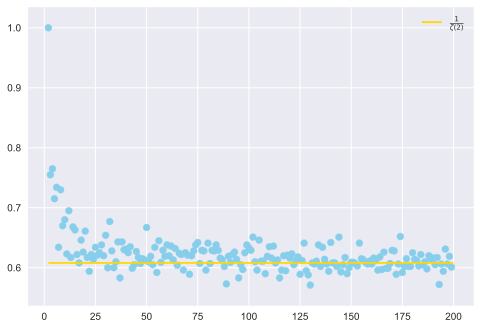

In [44]:
plt.scatter(x, y, color="skyblue")
plt.hlines(y=1/zeta(2), xmin=2, xmax=200, 
           colors="gold", label = r'$\frac{1}{\zeta(2)}$')
plt.legend()
plt.plot()

First, notice that when `x = 2`, the probability that two sampled numbers are coprime is 1. This is unsurprising, since sampling from range `[2, 2]` simply means that both the sampled numbers were 2---and of course, 2 and 2 are coprimes. However, as the range expands all the way up to 200, we see that the probability of two numbers being coprime drops precipitously, roughly converging to the vallue of $1 / \zeta(2)$ as we expect. Indeed, the dots seem to cluster around the gold line, which represents the vaule of the Zeta function evaluated at 2. 

But does this result generalize to cases where we sample more than just two numbers? In other words, if we sample $s$ numbers, would the probability that the numbers be coprime approach $1 / \zeta(s)$? Let's find out.

In [61]:
def test_n(n_nums):
    for n_num in n_nums:
        x, y = simulate(n_num, 200, 1000)
        plt.scatter(x, y)
        plt.hlines(y=1/zeta(n_num), xmin=2, xmax=200, 
           colors="gold")

Given a range of `n_num` values, the `test_n` function returns a plot for each `n_num`, which is effectively $s$ in our mathematical notation. We see that, for the three values of $s$ that were tested---2, 3, and 4---the Zeta function seems to approximate the probability of relative primeness pretty well. Based on our earlier mathematical analysis, we would expect this convergence to get even better as we expand out the `max_num` range, with an upper bound that is greater than the current 200.

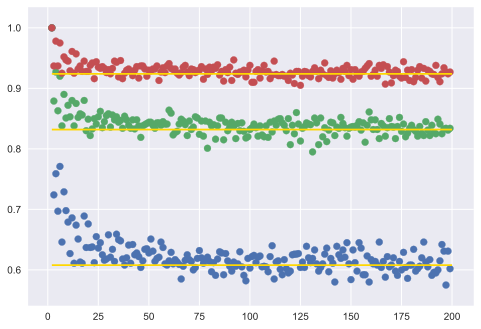

In [62]:
test_n(range(2, 5, 1))

# Aside on the Dirichlet Eta

While jumping around in Wikipedia, I came across the Dirichlet Eta function, which is a slight variant of the Riemann Zeta function. This function looks as follows:

$$
\begin{align}
\eta(s) 
&= 1 - \frac{1}{2^s} + \frac{1}{3^s} - \frac{1}{4^s} + \cdots \\
&= \sum_{n = 1}^\infty (-1)^{n - 1} \frac{1}{n^s}
\end{align}
$$

As you can see, this is essentially the alternating version of the Riemann Zeta function. 

Given this design, we can derive what may appear to be apparent to some yet nonetheless interesting relationship between the Eta and Zeta. Deriving this relationship requires a very similar operation to the sieving or factorizting we performed earlier to derive the probabilistic interpretation of the Zeta function. 

For a bit of intuition, observe that the Eta function can be split up into what may be referred to as even and odd terms. In other words, 

$$
\eta(s) = \left(1 + \frac{1}{3^s} + \frac{1}{5^s} + \cdots  \right) - \left( \frac{1}{2^s} + \frac{1}{4^s} + \cdots \right)
$$

The idea is that the even terms are just a multiple of the Zeta function, namely

$$
\left( \frac{1}{2^s} + \frac{1}{4^s} + \cdots \right) = \frac{1}{2^s} \zeta(s)
$$

Then, the odd terms can also be seen as the Zeta function minus this multiple:

$$
\begin{align}
\left(1 + \frac{1}{3^s} + \frac{1}{5^s} + \cdots  \right) 
&= \zeta(s) - \frac{1}{2^s} \zeta(s) \\
&= \zeta(s) \left( 1 - \frac{1}{2^s} \right)
\end{align}
$$

We now have successfully expressed both the even and odd terms of the Eta function in terms of the Zeta function. If we put the two together, we will then be able to express the entirety of the Eta function fully in terms of the Zeta function. To cut to the chase, we get

$$
\begin{align}
\eta(s) 
&= \zeta(s) \left( 1 - \frac{1}{2^s} \right) - \frac{1}{2^s} \zeta(s) \\
&= \zeta(s) \left( 1 - 2^{1 - s} \right)
\end{align}
$$

And there we have it, the relationship between the Dirichlet Eta function and the Riemann Zeta function! There are many more interesting things about the Eta function, such as its convergence property, but that is a topic for another post. 

# Conclusion

In this post, we developed an intuition for the implications of the Riemann Zeta function from the perspective of relative primeness and probability. The Zeta function is one of those things in mathematics that appear so simple on the surface, yet is so wonderfully complex and convoluted in the inside. Although we haven't discussed these other intricacies of the Riemann Zeta function---in particular, its relationship to the [Riemann hypothesis](https://en.wikipedia.org/wiki/Riemann_hypothesis), which states that the Zeta function has roots at negative even integers and complex numbers whose real part is $1/2$---but the approach we took here with prime numbers are probabilities is fascinating in its own right, providing ample food for thought. 

Many thanks to [Chris Henson](http://chrishenson.net/website/zeta.html) again for the code and the post. It's always a lot of fun to mesh mathematics with programming, and I think this is why I enjoyed writing this post. On a related note, I've recently gotten into Project Euler, so I might post about some problems now and then as well. 

I hope you've enjoyed reading this post. See you in the next one.